Feature Scaling : Normalization | MInMaxScaling | MaxAbsScaling | RobustScaling    
Techniques of normalization 
1. min max 
2. mean normalization 
3. max absulate scaling 
4. robust scaling 

min max scaling      
More PC.....

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
df = pd.read_csv('25_wine_data.csv', header=None, usecols=[0, 1, 2], names=['Class label', 'alcohol', 'Malic acid'])
df.head()

,Class label,alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

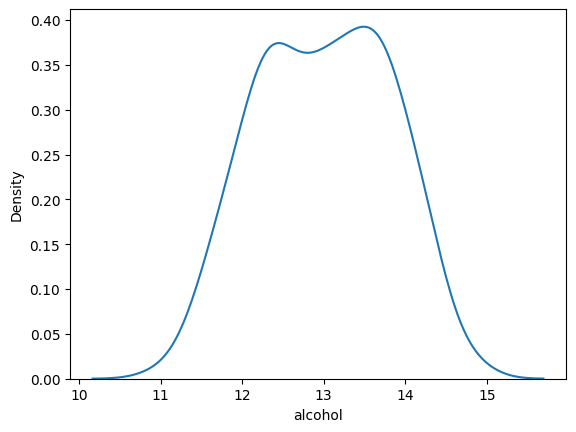

In [ ]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='Class label', ylabel='Density'>

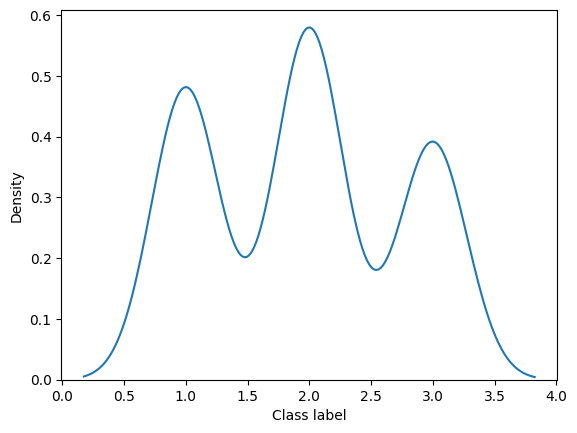

In [29]:
sns.kdeplot(df['Class label'])

<Axes: xlabel='Malic acid', ylabel='Density'>

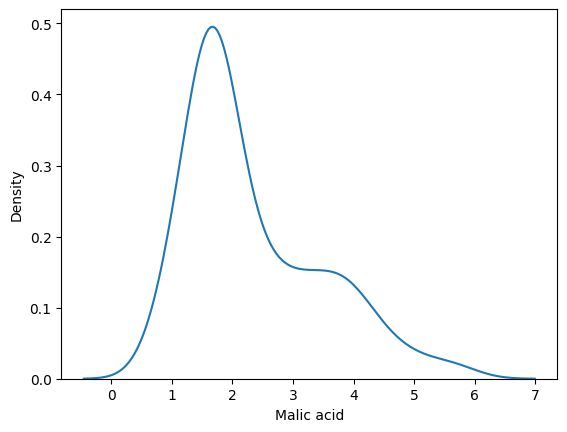

In [28]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='alcohol', ylabel='Malic acid'>

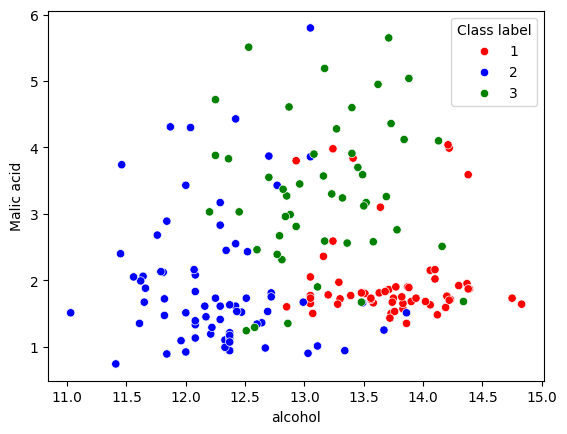

In [32]:
color_dict = {1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x=df['alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

To scale any data, first train_test_split.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit means minimum and maximum value has been derived(निकाली गई).
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [54]:
np.round(X_train.describe())

,alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


After scaling both value(alcoho, Malic acid) means=0, max=1

In [59]:
np.round(X_train_scaled.describe(), 1)

,alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


The original data was in the shape of a 2D rectangle, we need to squeeze it.  
are getting fit

Text(0.5, 1.0, 'After Scaling')

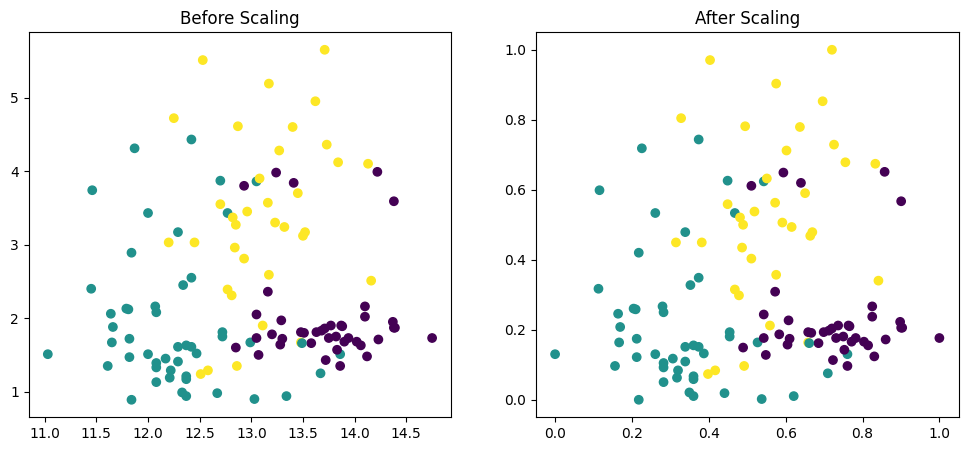

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')

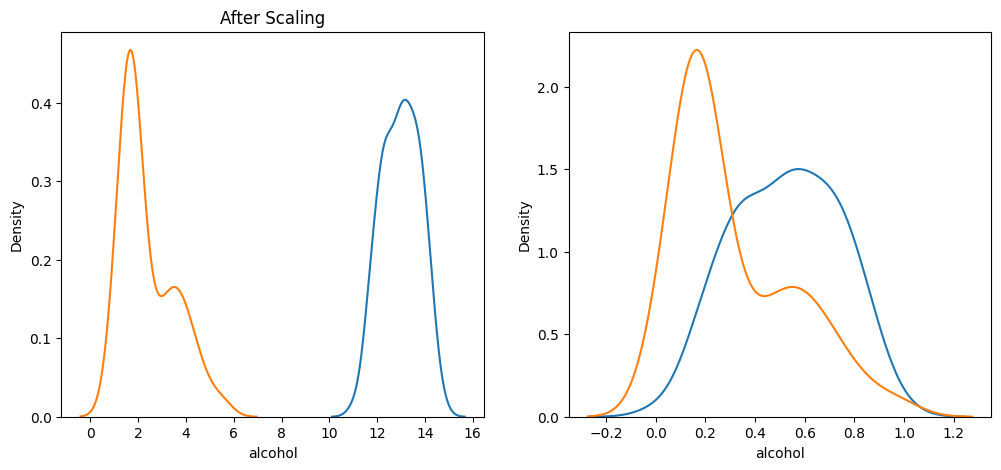

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax1.set_title('After Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)

plt.show()

<Axes: title={'center': 'Alchole Distrbution After Scaling'}, xlabel='alcohol', ylabel='Density'>

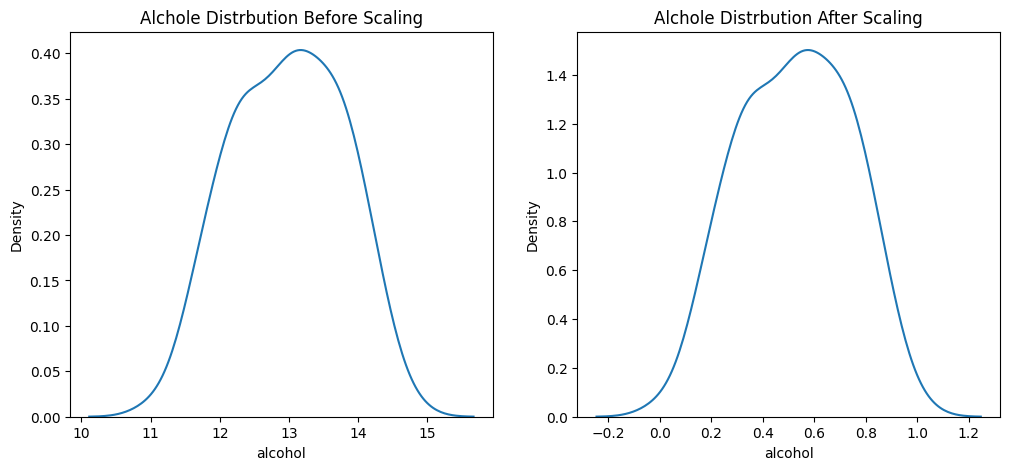

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Alchole Distrbution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

ax2.set_title('Alchole Distrbution After Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)

<Axes: title={'center': 'Alchole Distrbution After Scaling'}, xlabel='Malic acid', ylabel='Density'>

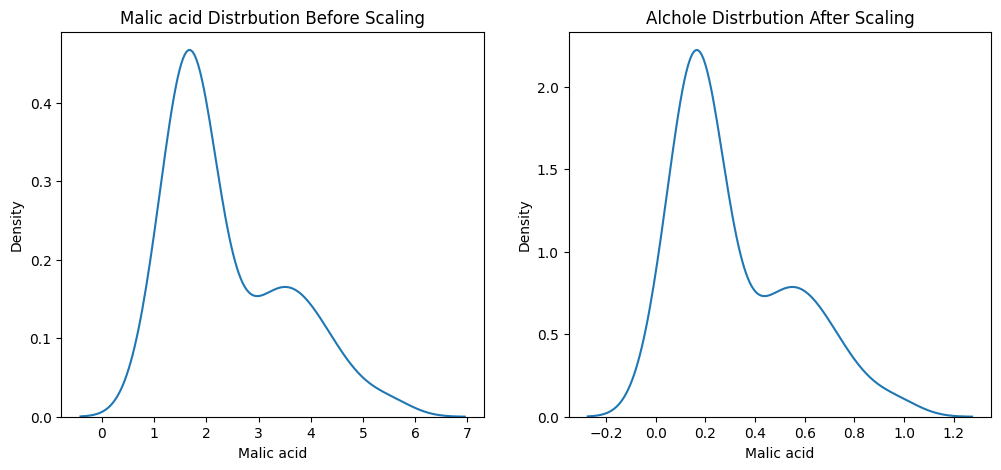

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Malic acid Distrbution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

ax2.set_title('Alchole Distrbution After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)